In [2]:
!pip3 install torch

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader 
from torch.utils.data import TensorDataset

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import random
import math

# Q1 gradient descent로 simple linear regression 추정하기

예제로 사용할 데이터 생성하기

$ y_i = \beta_0 + \beta_1 \times x_i + \epsilon_i \quad \epsilon_i \sim  iid N(0, 1)$ 

$ \beta_0 = 5, \beta_1 = 2$라는 모형을 따르는 데이터를 생성해준다. 

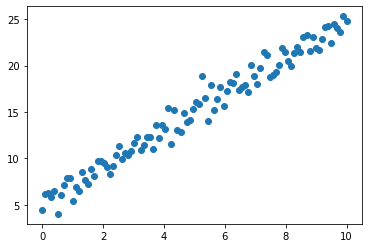

In [3]:
x_train_np = np.linspace(0, 10, 100).reshape(-1, 1)
y_train_np = 2 *  x_train_np + 5 + norm.rvs(0, 1, size = len(x_train_np)).reshape(-1, 1)

plt.scatter(x_train_np, y_train_np)
plt.show()

$ \hat{y_i} = \beta_0 + \beta_1 \times x_i $

$ \hat{y_i} = bias + weight \times x_i $

gradient descent를 사용해 bias와 weight를 학습해보자. 

1) 추정된 bias와 weight의 결과값은 얼마인가? 그래프를 그려 실제 회귀식에 가깝게 추정되었는지를 확인해보자. 

In [4]:
x_train = torch.FloatTensor(x_train_np)
y_train = torch.FloatTensor(y_train_np)

W = torch.zeros(1, requires_grad = True) # Weight
b = torch.zeros(1, requires_grad = True) # bias

optimizer = optim.SGD([W, b], lr = 0.01)

n_epochs = 1000
for epoch in range(n_epochs + 1):

    # H(x) 계산
    hypothesis = W * x_train + b
  
    # cost 계산: MSE
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'\
            .format(epoch, n_epochs, W.item(), b.item(), cost.item()))

Epoch    0/1000 W: 1.838, b: 0.301 Cost: 260.121216
Epoch  100/1000 W: 2.402, b: 2.310 Cost: 3.158217
Epoch  200/1000 W: 2.230, b: 3.453 Cost: 1.782672
Epoch  300/1000 W: 2.126, b: 4.149 Cost: 1.274237
Epoch  400/1000 W: 2.062, b: 4.571 Cost: 1.086307
Epoch  500/1000 W: 2.024, b: 4.829 Cost: 1.016844
Epoch  600/1000 W: 2.000, b: 4.985 Cost: 0.991168
Epoch  700/1000 W: 1.986, b: 5.080 Cost: 0.981678
Epoch  800/1000 W: 1.977, b: 5.138 Cost: 0.978170
Epoch  900/1000 W: 1.972, b: 5.173 Cost: 0.976874
Epoch 1000/1000 W: 1.969, b: 5.194 Cost: 0.976394


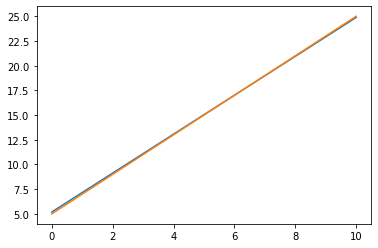

In [5]:
y_pred = W * x_train + b # 추정한 회귀식
y_real = 2 * x_train + 5 # 실제 회귀식

plt.plot(x_train_np, y_pred.detach().numpy())
plt.plot(x_train_np, y_real.detach().numpy())

2) learning rate를 0.03으로 조정해보자. 어떠한 문제가 발생하는가?

답: cost(MSE)가 최소가 되는 점을 찾지 못하고 발산한다. 

In [7]:
# 직접 W와 b를 정의하지 않고, nn.Module을 사용해 손쉽게 선형 모델을 생성할 수 있습니다. 
# 입출력값의 차원을 생각해 in_features와 out_features의 값을 적절하게 지정해주세요

in_features = 1
out_features = 1

model = nn.Linear(in_features = in_features, out_features = out_features, bias = True)

optimizer = optim.SGD(model.parameters(), lr = 0.03)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)
    
    # cost 계산
    cost = F.mse_loss(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        params = list(model.parameters())
        W = params[0].item()
        b = params[1].item()
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W, b, cost.item()
        ))

Epoch    0/1000 W: 4.807, b: 0.161 Cost: 138.919205
Epoch  100/1000 W: 441.290, b: 70.059 Cost: 6066743.000000
Epoch  200/1000 W: 94725.391, b: 14247.596 Cost: 282261258240.000000
Epoch  300/1000 W: 20431730.000, b: 3072123.500 Cost: 13132494941454336.000000
Epoch  400/1000 W: 4407060992.000, b: 662646720.000 Cost: 610991820971310055424.000000
Epoch  500/1000 W: 950597189632.000, b: 142932115456.000 Cost: 28426956043949510548783104.000000
Epoch  600/1000 W: 205042443354112.000, b: 30830216871936.000 Cost: 1322587816248976995082875961344.000000
Epoch  700/1000 W: 44227314061410304.000, b: 6650031008382976.000 Cost: 61534453892603740136128154083262464.000000
Epoch  800/1000 W: 9539787294072897536.000, b: 1434405002532618240.000 Cost: inf
Epoch  900/1000 W: 2057716343318786342912.000, b: 309398244378399473664.000 Cost: inf
Epoch 1000/1000 W: 443844839343313326702592.000, b: 66736618099787459198976.000 Cost: inf


3) learning rate를 0.00000001로 조정해보자. 어떠한 문제가 발생하는가?

답: cost가 최소가 되는 점을 찾기까지 시간이 오래걸린다. epoch수를 늘리면 찾을수도 있지만 비효율적이다. 

In [8]:
W = torch.zeros(1, requires_grad = True) # Weight
b = torch.zeros(1, requires_grad = True) # bias

optimizer = optim.SGD([W, b], lr = 0.00000001)

n_epochs = 1000
for epoch in range(n_epochs + 1):

  # H(x) 계산
  hypothesis = x_train * W + b 
  
  # cost 계산: MSE
  cost = torch.mean((hypothesis - y_train)**2) 

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
      print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
          epoch, nb_epochs, W.item(), b.item(), cost.item()
      ))

Epoch    0/1000 W: 0.000, b: 0.000 Cost: 260.121216
Epoch  100/1000 W: 0.000, b: 0.000 Cost: 260.086548
Epoch  200/1000 W: 0.000, b: 0.000 Cost: 260.051849
Epoch  300/1000 W: 0.001, b: 0.000 Cost: 260.017151
Epoch  400/1000 W: 0.001, b: 0.000 Cost: 259.982422
Epoch  500/1000 W: 0.001, b: 0.000 Cost: 259.947784
Epoch  600/1000 W: 0.001, b: 0.000 Cost: 259.913086
Epoch  700/1000 W: 0.001, b: 0.000 Cost: 259.878387
Epoch  800/1000 W: 0.001, b: 0.000 Cost: 259.843750
Epoch  900/1000 W: 0.002, b: 0.000 Cost: 259.809082
Epoch 1000/1000 W: 0.002, b: 0.000 Cost: 259.774445


# Q2. train set and test set - MNIST

MNIST dataset을 불러온다. 

In [9]:
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

data_loader = DataLoader(dataset = mnist_train,
                         batch_size = 100, 
                         shuffle = True
                         )

9913344it [00:01, 9466545.94it/s]                              


Extracting MNIST_data/MNIST\raw\train-images-idx3-ubyte.gz to MNIST_data/MNIST\raw



29696it [00:00, 9928581.23it/s]          


Extracting MNIST_data/MNIST\raw\train-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw



1649664it [00:06, 242150.66it/s]                             


Extracting MNIST_data/MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST_data/MNIST\raw



5120it [00:00, ?it/s]                   

Extracting MNIST_data/MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw



1) epoch 수를 15로 설정하여 trainset을 훈련시켜보자. 

그 후 훈련시킨 모델로 testset에 대한 평가를 진행해보자. 

In [10]:
# train model with train sets

# 입출력값의 차원을 생각해 in_features와 out_features의 값을 적절하게 지정해주세요

in_features = 28*28
out_features = 10
linear = torch.nn.Linear(in_features = in_features, out_features=out_features, bias = True)

criterion = torch.nn.CrossEntropyLoss()    # Softmax is internally computed.
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

training_epochs = 15

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28)
        Y = Y

        # H(x) 계산
        hypothesis = linear(X)

        # cost 계산
        cost = criterion(hypothesis, Y)

        #cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

Epoch: 0001 cost = 0.537330985
Epoch: 0002 cost = 0.359059513
Epoch: 0003 cost = 0.331334144
Epoch: 0004 cost = 0.316433430
Epoch: 0005 cost = 0.307319254
Epoch: 0006 cost = 0.300115943
Epoch: 0007 cost = 0.294999033
Epoch: 0008 cost = 0.290791422
Epoch: 0009 cost = 0.287469208
Epoch: 0010 cost = 0.284666836
Epoch: 0011 cost = 0.281874001
Epoch: 0012 cost = 0.279690772
Epoch: 0013 cost = 0.277972311
Epoch: 0014 cost = 0.275999486
Epoch: 0015 cost = 0.274480402


In [62]:
# Test the model using test sets
with torch.no_grad(): # torch.no_grad()를 사용하는 이유를 간단하게 설명해봅시다. 

    X_test = mnist_test.data.view(-1, 28 * 28).float()
    Y_test = mnist_test.targets

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())
    print('cost:', cost.item())

Accuracy: 0.8805000185966492
cost: 0.004604272078722715


2) epoch 수를 30으로 설정하여 trainset을 훈련시켜보자. 

그 후 훈련시킨 모델로 testset에 대한 평가를 진행해보자. 

어떠한 문제가 발생하는가?

In [ ]:
linear = torch.nn.Linear(784, 10, bias = True)
criterion = torch.nn.CrossEntropyLoss()   
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

training_epochs = 30

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        X = X.view(-1, 28 * 28)
        Y = Y

        # H(x) 계산
        hypothesis = linear(X)

        # cost 계산
        cost = criterion(hypothesis, Y)

        #cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    if epoch % 5 == 0:
      print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

In [ ]:
# Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float()
    Y_test = mnist_test.test_labels

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    
    print('Accuracy:', accuracy.item())
    print('cost:', cost.item())

# Q3. XOR problem with multilayer perceptron



In [72]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = torch.FloatTensor([[1], [0], [0], [1]])

# 입출력값의 차원을 고려하여 아래 빈칸을 적절하게 채워주세요
linear1 = torch.nn.Linear(2, 2, bias = True)
linear2 = torch.nn.Linear(2, 1, bias = True)
sigmoid = torch.nn.Sigmoid()

# 딥러닝의 구조를 고려하여 multi perceptron 모델을 적절하게 생성하세요. 
# nn.Sequential 함수를 사용하세요
model =  torch.nn.Sequential(linear1, sigmoid, linear2, sigmoid)

# 이 예제에서 cross entropy 대신 BCE를 사용하는 이유를 간단하게 설명하세요
criterion = torch.nn.BCELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr = 1)

for step in range(1001):
  hypothesis = model(X)
  cost = criterion(hypothesis, Y)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()
  if step%100 == 0:
    print(step, cost.item())


0 0.7627041339874268
100 0.6931741833686829
200 0.6929923892021179
300 0.6927019953727722
400 0.6918562054634094
500 0.6871405839920044
600 0.6400769352912903
700 0.4901672601699829
800 0.16998550295829773
900 0.07093490660190582
1000 0.04269516468048096


In [74]:
# Accuracy computation
# True if hypothesis>0.5 else False
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('\nHypothesis: ', hypothesis.detach().cpu().numpy(), '\nCorrect: ', predicted.detach().cpu().numpy(), '\nAccuracy: ', accuracy.item())


Hypothesis:  [[0.95920366]
 [0.05844949]
 [0.0331317 ]
 [0.96607643]] 
Correct:  [[1.]
 [0.]
 [0.]
 [1.]] 
Accuracy:  1.0


##Q4. Sine Function Approximation using the Legendre *Polynomial*

n = 3일때 르장드르 다항식은 다음과 같다. \
$ P_{3} = \frac{1}{2} (5x^{3} -3x) $ \
이 함수를 사용하여, sine함수를 근사하도록 학습하려고 한다.


1) Forward, Backward 함수를 직접 작성하여보자.

In [75]:
# 이 클래스에서, forward, backward 함수가 하는 기능이 무엇인지 설명해주세요.

class Legendre3Function(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input):
        ctx.save_for_backward(input)
        return 0.5 * (5 * input ** 3 - 3 * input)

    @staticmethod
    def backward(ctx, grad_output):
        input, = ctx.saved_tensors
        return grad_output * 0.5 * (15 * input ** 2 - 3)
        # Hint : Legendre Polynomial의 differential

2) 학습을 위한 parameter와 Data를 세팅해보자.
   우리가 사용하려는 모델은 다음과 같다.\
   $ y = a + b * P_{3}(c + d * x) $

In [107]:
dtype = torch.float
device = torch.device("cpu")

x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x) # Target function to approximate

# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
b = torch.full((), -1.0, device=device, dtype=dtype, requires_grad=True)
c = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
d = torch.full((), 0.3, device=device, dtype=dtype, requires_grad=True)

3) 1)에서 정의한 forward, backward 함수를 사용하여,
   딥러닝 학습 과정을 직접 작성해보자.\
   \
   Learning rate의 경우, 5e-2, 5e-4, 5e-6, 5e-8 중,
   가장 적절한 Learning rate를 찾아보자. \
   적절한 learning rate보다 learning rate가 크거나 작을 때,
   어떤 현상이 발생하는지 살펴보자.

In [114]:
dtype = torch.float
device = torch.device("cpu")

x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x) # Target function to approximate

# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
b = torch.full((), -1.0, device=device, dtype=dtype, requires_grad=True)
c = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
d = torch.full((), 0.3, device=device, dtype=dtype, requires_grad=True)

# [5e-2, 5e-4, 5e-6, 5e-8] 중 적절한 learning rate를 찾아주세요.
# 적절한 learning rate보다 learning rate가 크거나 작을 때, 어떤 차이가 생기는지
# 말씀해주세요.
learning_rate = 5e-4

# epoch = 2000
for t in range(2000):
    P3 = Legendre3Function.apply

    # Forward pass: predict y.
    # P3 using our custom backward function.
    y_pred = a + b * P3(c + d*x)

    # Compute and print MSE loss
    loss = torch.mean((y_pred - y) ** 2)
    #loss = (y_pred - y).pow(2).sum().mean()
    
    if t % 100 == 0:
        print(t, loss.item())

    # Use autograd to compute the backward pass.
    loss.backward()

    # Update weights using gradient descent
    # Hint : use a, b, c, d, learning_rate, a.grad, b.grad, c.grad, d.grad
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad
        
        # Manually zero the gradients after updating weights
        a.grad = a.grad.zero_()
        b.grad = b.grad.zero_()
        c.grad = c.grad.zero_()
        d.grad = d.grad.zero_()


print(f'Result: y = {a.item()} + {b.item()} * P3({c.item()} + {d.item()} x)')

0 0.23095129430294037
100 0.1509966403245926
200 0.14725176990032196
300 0.14441931247711182
400 0.1416771560907364
500 0.13899119198322296
600 0.13635893166065216
700 0.13377919793128967
800 0.13125082850456238
900 0.1287727952003479
1000 0.12634404003620148
1100 0.12396357953548431
1200 0.12163046002388
1300 0.11934355646371841
1400 0.11710204184055328
1500 0.11490498483181
1600 0.11275143176317215
1700 0.11064045876264572
1800 0.10857129096984863
1900 0.10654299706220627
Result: y = 8.033133047646857e-10 + -1.2193704843521118 * P3(-2.7714635031372836e-09 + 0.2458818107843399 x)


##Q5. Different Basis Function for approximating sine function

이번에는 ReLu function을 사용하여 sine함수를 학습해보려 한다. \
ReLu function을 사용했을 때에도, 학습이 잘 되는지 살펴보자.

In [123]:
class ReLuFunction(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input):
        ctx.save_for_backward(input)
        #return input.clamp(min=0)
        return torch.clamp(input, min=0)
    @staticmethod
    def backward(ctx, grad_output):
        input, = ctx.saved_tensors
        grad_input = grad_output.clone()
        grad_input[grad_input < 0] = 0
        # Hint : reLu function의 도함수의 형태를 반영하면 됩니다.
        return grad_input

dtype = torch.float
device = torch.device("cpu")

x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Our model : y = a + b * ReLu(c + d * x).
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
b = torch.full((), 1.0, device=device, dtype=dtype, requires_grad=True)
c = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
d = torch.full((), 1.0, device=device, dtype=dtype, requires_grad=True)

learning_rate = 5e-7
for t in range(2000):
    ReLu = ReLuFunction.apply

    # Forward pass: predict y.
    # ReLu using our custom backward function.
    y_pred = a * b * ReLu(c + d*x)

    # Compute and print MSE loss
    loss = torch.mean((y_pred-y)**2)
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass.
    loss.backward()

    # Update weights using gradient descent
    # Hint : use a, b, c, d, learning_rate, a.grad, b.grad, c.grad, d.grad
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad
        
        # Manually zero the gradients after updating weights
        a.grad = a.grad.zero_()
        b.grad = b.grad.zero_()
        c.grad = c.grad.zero_()
        d.grad = d.grad.zero_()

print(f'Result: y = {a.item()} + {b.item()} * ReLu({c.item()} + {d.item()} x)')

99 0.4997005760669708
199 0.49965062737464905
299 0.49960067868232727
399 0.49955081939697266
499 0.49950098991394043
599 0.4994511008262634
699 0.4994012415409088
799 0.4993514120578766
899 0.49930158257484436
999 0.4992517828941345
1099 0.49920201301574707
1199 0.499152272939682
1299 0.49910253286361694
1399 0.4990527927875519
1499 0.4990031123161316
1599 0.49895337224006653
1699 0.498903751373291
1799 0.49885401129722595
1899 0.49880439043045044
1999 0.4987547695636749
Result: y = 0.0009978566085919738 + 1.0 * ReLu(-3.174852167830977e-07 + 1.0 x)


## Q6. 
Q4, Q5에서 학습한 결과를 바탕으로, 어떤 function을 사용하는 것이 학습에 더 적절했었는지 코멘트해주세요.

## Q7. Deep Learning Example

주어진 데이터를 로딩하고, 아래 코드의 빈칸을 채워
딥러닝 학습을 하는 코드를 완성하여보자.

In [ ]:
# 업로드 시간이 7분 30초 가량 걸리기에, 그동안 밑에 코드 작성 먼저 해주셔도 됩니다. (colab 사용시)
# colab 사용하시면, 주석 지우고 사용해주세요

# from google.colab import files
# uploaded = files.upload()

Saving testX.csv to testX.csv
Saving testY.csv to testY.csv
Saving trainX.csv to trainX.csv
Saving trainY.csv to trainY.csv


In [144]:
# Data Loading using pd.read_csv

train_X = pd.read_csv("trainX.csv", header = None, encoding = 'utf-8')
train_Y = pd.read_csv("trainY.csv", header = None, encoding = 'utf-8')

test_X = pd.read_csv("testX.csv", header = None, encoding = 'utf-8')
test_Y = pd.read_csv("testY.csv", header = None, encoding = 'utf-8')

In [145]:
# Data Setting
train_X = np.array(train_X)
train_Y = np.array(train_Y)

test_X = np.array(test_X)
test_Y = np.array(test_Y)

input_dim = len(train_X[0])

# Data type casting to torchTensor
train_x = torch.FloatTensor(train_X)
train_y = torch.FloatTensor(train_Y)

# Set batch size
batch_size = 4096
dataset = TensorDataset(train_x, train_y)

# DataLoader setting
# 셔플이 있고, batch size에 맞게 dataloader를 세팅해주세요,
dataloader = DataLoader(dataset, batch_size = batch_size, shuffle = True)

In [146]:
# Model Setting
model = torch.nn.Sequential(
    torch.nn.Linear(input_dim, int(input_dim/6)),
    # 각 Layer의 activation function을 설정해주세요.
    torch.nn.ReLU(),
    # Hint : hidden layer activation function ReLu
    torch.nn.Linear(int(input_dim/6), int(input_dim/5)),
    torch.nn.ReLU(),
    # Hint : hidden layer activation function ReLu
    torch.nn.Linear(int(input_dim/5), 1),
    torch.nn.Sigmoid(),
    # Hint : Output layer activation function for binary classification
    )

In [147]:
params = list(model.parameters())
print("The number of parameters:", sum([p.numel() for p in model.parameters() if p.requires_grad]), "elements")
x = torch.from_numpy(train_X.astype(np.float32))
y = torch.from_numpy(train_Y.astype(np.float32)).view(-1, 1)

# loss function 부분을 채워주세요.
# BCE loss를 사용합니다.
loss_fn = torch.nn.BCELoss()

The number of parameters: 1977 elements


In [148]:
print(trainx)
print(trainx.shape)
print(train_x)
print(train_x.shape)

tensor([[11.9160,  7.9492,  0.6234,  ...,  2.3474,  0.5403,  5.7957],
        [-6.5538, -0.7557,  0.7521,  ...,  4.6906,  6.4897,  2.5422],
        [ 1.9634,  7.5538,  9.8412,  ...,  0.7196,  2.3400, -4.2287],
        ...,
        [-0.5099, -0.5238,  2.3014,  ...,  1.0998,  1.1777, -7.7745],
        [ 3.0190,  4.8867, -4.7574,  ...,  8.0543,  9.8819,  0.0453],
        [ 2.1500,  5.6854,  1.6438,  ...,  5.4736,  4.9149,  8.8774]])
torch.Size([4096, 100])
tensor([[ -7.2289,   6.4639,   0.4723,  ...,  -5.3620,   0.9606,   2.7308],
        [  0.6807,  -4.1687,   7.0343,  ...,  -5.3656,   6.3480, -10.8060],
        [  1.8875,   2.8457,  -2.8618,  ...,  -3.2862,   3.8450,   0.6044],
        ...,
        [  0.8668,  -0.0822,   2.7489,  ...,   4.6874,   4.2303,   1.3666],
        [  1.1173,   2.8448,  -2.6263,  ...,   6.4338, -14.5917,   1.3880],
        [ -4.5469,   0.7909,   5.9456,  ...,  -9.8783,   7.5069,   6.7853]])
torch.Size([16000, 100])


In [149]:
learning_rate = 1e-3
iter = 200
loss_list = []
# Adam optimizer를 설정해주세요. learning rate, 그리고 weight_decay는 5e-2로 설정해주세요.
optimizer = optim.Adam(model.parameters(), lr = learning_rate, weight_decay=5e-2)

prev_loss = 1e+30

for t in range(iter+1):
    for batch, sample in enumerate(dataloader):
      trainx, trainy = sample
      y_pred = model(trainx)

      loss = loss_fn(y_pred, trainy)

      # gradient 계산 및 gradient descent 계산을 통한 optimization 부분
      # 코드를 채워주세요.
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
    
      loss_list.append(loss.item())

    cur_loss = np.mean(loss_list[max(0, len(loss_list)-batch-1):len(loss_list)-1])
    
    if t % 10 == 0:
      print('iter {}/{} loss: {:.4f}'.format(
             t, iter, cur_loss))

iter 0/200 loss: 0.7345
iter 10/200 loss: 0.5753
iter 20/200 loss: 0.5479
iter 30/200 loss: 0.5288
iter 40/200 loss: 0.5131
iter 50/200 loss: 0.4963
iter 60/200 loss: 0.4824
iter 70/200 loss: 0.4678
iter 80/200 loss: 0.4568
iter 90/200 loss: 0.4483
iter 100/200 loss: 0.4375
iter 110/200 loss: 0.4320
iter 120/200 loss: 0.4272
iter 130/200 loss: 0.4230
iter 140/200 loss: 0.4228
iter 150/200 loss: 0.4165
iter 160/200 loss: 0.4153
iter 170/200 loss: 0.4129
iter 180/200 loss: 0.4095
iter 190/200 loss: 0.4147
iter 200/200 loss: 0.4131


Weighted F1: 0.818689800707506


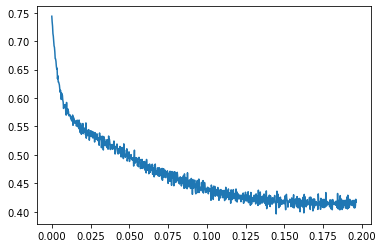

In [150]:
y_predict = model(torch.from_numpy(test_X.astype(np.float32)))
y_pred = y_predict.detach().numpy()

# test set의 prediction값을 계산하는 식을 작성하고, weighted f1 score를 계산해주세요.
y_pred = [1.0 if x >= 0.5 else 0.0 for x in y_pred]
result = f1_score(test_Y, y_pred, average="weighted")

# 결과물 출력
print("Weighted F1:", result)
step = np.linspace(0, len(loss_list), len(loss_list))
plt.plot(step/int(batch_size + 1), np.array(loss_list))